# Electric Vehicle Market Segmentation

### Problem Statement: Conduct Demographic Segmentation of the EV Market in India. 

In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv("C:\\Users\\MAHIMA\\OneDrive\\Desktop\\Feynn Labs internship\\P2\\ev_data.csv")
df.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2
1,27,Ahmedabad,NaN,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,<15 lakhs,4
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,<25 lakhs,2
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,<15 lakhs,4


## Data Preprocessing and Data Cleaning

In [3]:
df.shape

(990, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      990 non-null    int64  
 1   city                     990 non-null    object 
 2   profession               535 non-null    object 
 3   marital_stat             990 non-null    object 
 4   education                990 non-null    object 
 5   family_count             990 non-null    int64  
 6   annual_income            990 non-null    float64
 7   replace_with_ev          990 non-null    object 
 8   preferred_ev_type        990 non-null    object 
 9   think_ev_are_economical  990 non-null    object 
 10  preferred_brand          990 non-null    object 
 11  preferred_price_range    990 non-null    object 
 12  preferred_wheel_count    990 non-null    int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 100.7+ KB


In [5]:
df.isnull().sum()

age                          0
city                         0
profession                 455
marital_stat                 0
education                    0
family_count                 0
annual_income                0
replace_with_ev              0
preferred_ev_type            0
think_ev_are_economical      0
preferred_brand              0
preferred_price_range        0
preferred_wheel_count        0
dtype: int64

In [6]:
df.profession.fillna(value="Not Working", inplace=True)

In [7]:
df.isnull().sum()

age                        0
city                       0
profession                 0
marital_stat               0
education                  0
family_count               0
annual_income              0
replace_with_ev            0
preferred_ev_type          0
think_ev_are_economical    0
preferred_brand            0
preferred_price_range      0
preferred_wheel_count      0
dtype: int64

In [8]:
df.shape

(990, 13)

In [9]:
df.describe()

,age,family_count,annual_income,preferred_wheel_count
count,990.000000,990.000000,9.900000e+02,990.000000
mean,31.802020,4.116162,2.261180e+06,3.350505
std,11.279929,1.469488,1.001444e+06,0.886578
min,15.000000,0.000000,-3.761509e+05,2.000000
25%,26.000000,4.000000,1.794900e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.758737e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


In [10]:
df.shape

(990, 13)

In [11]:
df.describe()

,age,family_count,annual_income,preferred_wheel_count
count,990.000000,990.000000,9.900000e+02,990.000000
mean,31.802020,4.116162,2.261180e+06,3.350505
std,11.279929,1.469488,1.001444e+06,0.886578
min,15.000000,0.000000,-3.761509e+05,2.000000
25%,26.000000,4.000000,1.794900e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.758737e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


In [12]:
df['city'].unique()

array(['New Delhi', 'Ahmedabad', 'Pune', 'Mumbai', 'Banglore ',
       'Nellore ', 'Haldwani', 'Delhi', 'Noida', 'pUNE', 'Pune ',
       'Faridabad ', 'Nabha', 'Satara', 'Delhi ', 'Chandrapur ',
       'Mumbai ', 'Haldwani ', 'Chennai', 'Gurugram ', 'pune', 'Rewari',
       'Nagpur', 'Patiyala', 'Nashik', 'Jhansi', 'Kashipur ', 'solapur',
       'Bengaluru', 'Hakdwani', 'Karnal', 'Serampore', 'Jalandhar',
       'New Delhi ', 'nashik'], dtype=object)

In [13]:
df["city"] = df["city"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df["city"] = df["city"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df["city"] = df["city"].replace({"Banglore ":"Bengaluru"})
df["city"] = df["city"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df["city"] = df["city"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df["city"] = df["city"].replace({"nashik":"Nashik"})

In [14]:
df['city'].unique()

array(['New Delhi', 'Ahmedabad', 'Pune', 'Mumbai', 'Bengaluru',
       'Nellore ', 'Haldwani', 'Noida', 'Faridabad ', 'Nabha', 'Satara',
       'Chandrapur ', 'Chennai', 'Gurugram ', 'Rewari', 'Nagpur',
       'Patiyala', 'Nashik', 'Jhansi', 'Kashipur ', 'solapur', 'Karnal',
       'Serampore', 'Jalandhar'], dtype=object)

In [15]:
df['preferred_price_range'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '>25 lakhs', '1500000',
       '2000000', '1200000', '700000'], dtype=object)

In [16]:
df['preferred_price_range'] = df['preferred_price_range'].replace({'<15 lakhs':'5-15 lakhs', '<25 lakhs': '15-25 lakhs'})
df['preferred_price_range'] = df['preferred_price_range'].replace({'1500000':'15-25 lakhs', '2000000': '15-25 lakhs', '1200000': '5-15 lakhs', '700000': '5-15 lakhs'})
df['preferred_price_range'].unique()

array(['<5 lakhs', '5-15 lakhs', '15-25 lakhs', '>25 lakhs'], dtype=object)

In [17]:
df.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2
1,27,Ahmedabad,Not Working,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,5-15 lakhs,4
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,15-25 lakhs,2
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,5-15 lakhs,4


## EDA

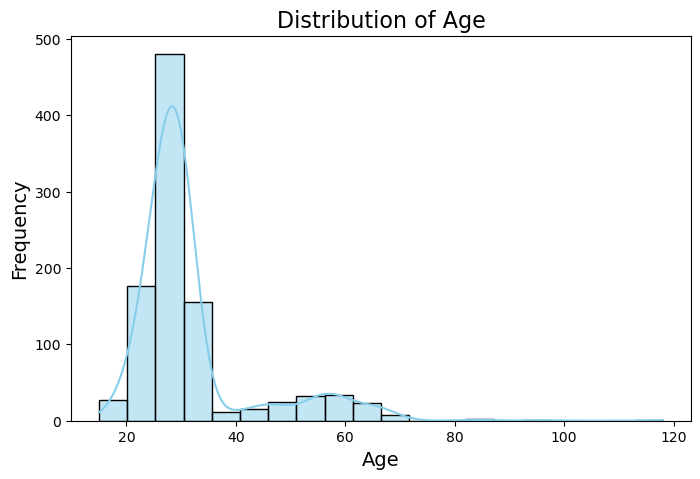

In [18]:
# Plotting a histogram for the 'age' column
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

#### Majority of the population seemed to belong to the age group 20-40. 

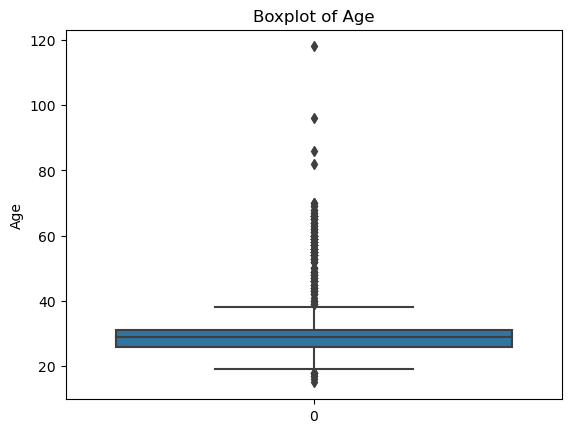

In [19]:
sns.boxplot(df['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

#### The outliers seems to contain important information necessary, therefore we will retain them all.

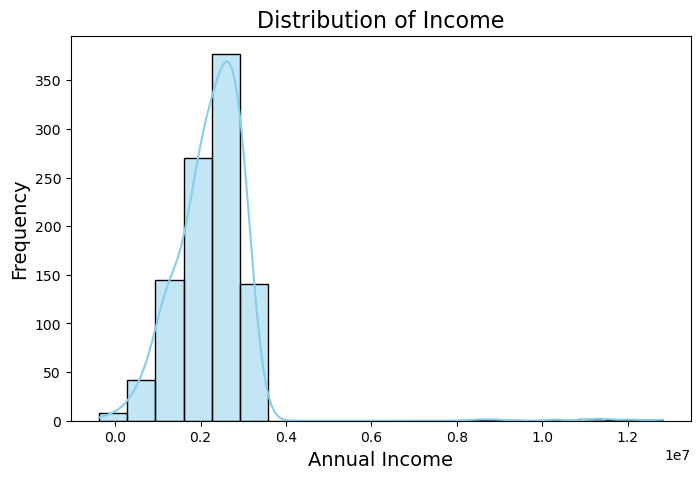

In [20]:
# Plotting a histogram for the 'annual income' column
plt.figure(figsize=(8, 5))
sns.histplot(df['annual_income'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Income', fontsize=16)
plt.xlabel('Annual Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

#### The Distribution of Annual Income is heavily skewed.

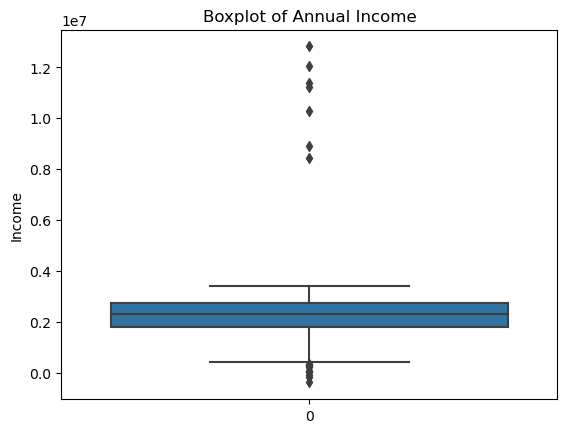

In [21]:
sns.boxplot(df['annual_income'])
plt.title('Boxplot of Annual Income')
plt.ylabel('Income')
plt.show()

#### The outliers seems to contain important information necessary, therefore we will retain them all.

In [22]:
df['replace_with_ev'].value_counts()

replace_with_ev
Yes      655
Maybe    200
No       135
Name: count, dtype: int64

In [23]:
df['think_ev_are_economical'].value_counts()

think_ev_are_economical
Yes      760
Maybe    123
No       107
Name: count, dtype: int64

#### Majority people thing EVs are economical and want to adopt EVs. 

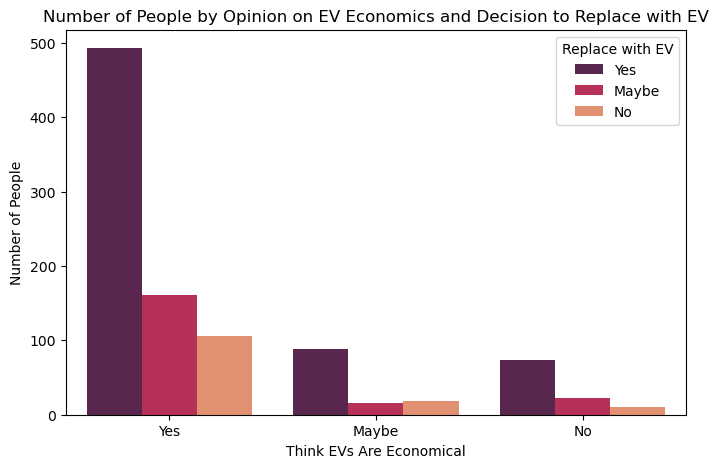

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='think_ev_are_economical', hue='replace_with_ev', palette='rocket')
plt.title('Number of People by Opinion on EV Economics and Decision to Replace with EV')
plt.xlabel('Think EVs Are Economical')
plt.ylabel('Number of People')
plt.legend(title='Replace with EV')
plt.show()

#### This shows that regardless of people's opinions about EVs being Economical, majority want to adopt EVs

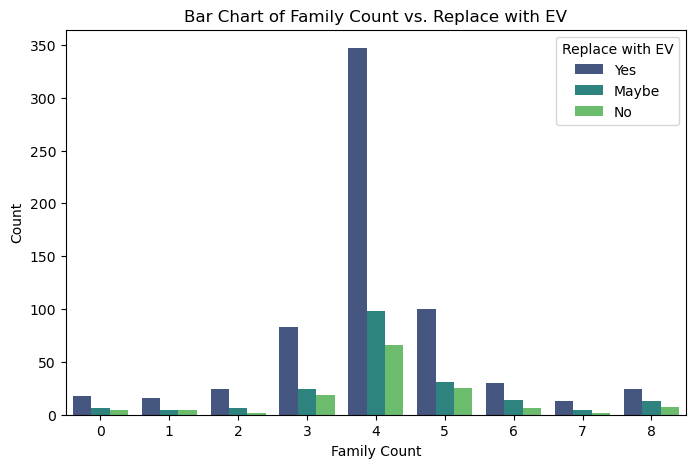

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='family_count', hue='replace_with_ev', palette='viridis')
plt.title('Bar Chart of Family Count vs. Replace with EV')
plt.xlabel('Family Count')
plt.ylabel('Count')
plt.legend(title='Replace with EV')
plt.show()

#### Majority of population have family size 3-5

## Data Labeling and Feature Scaling

In [26]:
df1 = df.copy()

In [27]:
df['preferred_price_range'].unique()

array(['<5 lakhs', '5-15 lakhs', '15-25 lakhs', '>25 lakhs'], dtype=object)

In [28]:
df1["preferred_price_range"] = df1["preferred_price_range"].replace({'<5 lakhs':1, '5-15 lakhs': 2, '15-25 lakhs': 3, '>25 lakhs': 4})

In [29]:
df1.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,1,2
1,27,Ahmedabad,Not Working,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,2,4
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,1,4
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,3,2
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,2,4


In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to only categorical columns
for column in df1.columns:
    if df1[column].dtype == 'object':  
        df1[column] = label_encoder.fit_transform(df1[column])

df1

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count
0,30,16,3,1,1,4,1.770466e+06,2,3,2,6,1,2
1,27,0,1,1,1,4,7.600731e+05,2,3,2,12,2,4
2,28,19,3,1,1,4,2.779701e+06,0,4,2,3,1,4
3,26,19,2,1,1,4,1.473698e+06,2,4,2,14,3,2
4,25,19,3,1,1,4,2.430643e+06,2,4,2,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,32,16,2,1,0,3,2.259379e+06,0,3,2,3,2,4
986,30,19,1,1,0,5,3.353677e+06,2,3,2,14,3,2
987,31,19,2,1,0,2,5.689586e+05,2,3,0,6,3,4
988,31,19,1,0,0,4,3.162609e+06,2,3,1,4,2,2


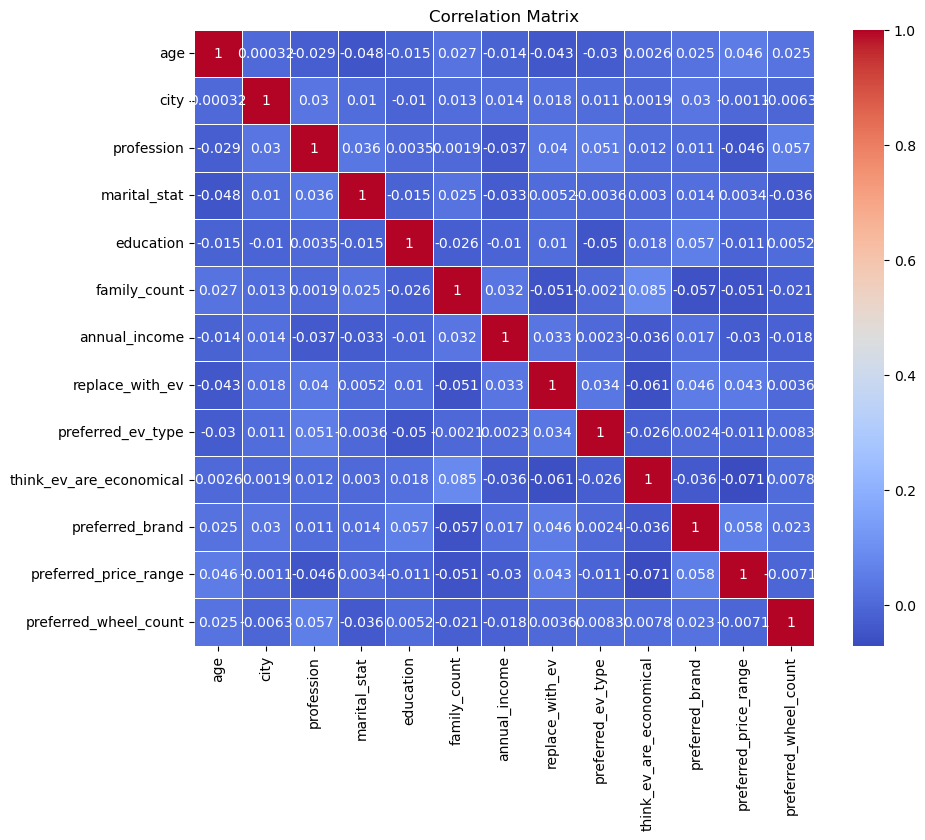

In [31]:
# Calculating the correlation matrix
corr_matrix = df1.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [32]:
df1 = df1.drop(['profession', 'education', 'marital_stat', 'preferred_brand', 'city'], axis = 1)
df1.head()

,age,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_price_range,preferred_wheel_count
0,30,4,1.770466e+06,2,3,2,1,2
1,27,4,7.600731e+05,2,3,2,2,4
2,28,4,2.779701e+06,0,4,2,1,4
3,26,4,1.473698e+06,2,4,2,3,2
4,25,4,2.430643e+06,2,4,2,2,4


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      990 non-null    int64  
 1   family_count             990 non-null    int64  
 2   annual_income            990 non-null    float64
 3   replace_with_ev          990 non-null    int32  
 4   preferred_ev_type        990 non-null    int32  
 5   think_ev_are_economical  990 non-null    int32  
 6   preferred_price_range    990 non-null    int64  
 7   preferred_wheel_count    990 non-null    int64  
dtypes: float64(1), int32(3), int64(4)
memory usage: 50.4 KB


In [34]:
df1.describe()

,age,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_price_range,preferred_wheel_count
count,990.000000,990.000000,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000
mean,31.802020,4.116162,2.261180e+06,1.459596,2.741414,1.643434,1.950505,3.350505
std,11.279929,1.469488,1.001444e+06,0.808126,1.066922,0.691661,0.770129,0.886578
min,15.000000,0.000000,-3.761509e+05,0.000000,0.000000,0.000000,1.000000,2.000000
25%,26.000000,4.000000,1.794900e+06,1.000000,2.000000,2.000000,1.000000,2.000000
50%,29.000000,4.000000,2.329246e+06,2.000000,3.000000,2.000000,2.000000,4.000000
75%,31.000000,5.000000,2.758737e+06,2.000000,3.000000,2.000000,2.000000,4.000000
max,118.000000,8.000000,1.282128e+07,2.000000,4.000000,2.000000,4.000000,4.000000


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
df2 = pd.DataFrame(df_scaled, columns = df1.columns)
df2.head()

,age,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_price_range,preferred_wheel_count
0,-0.159835,-0.079089,-0.490254,0.669051,0.242489,0.515782,-1.234839,-1.524048
1,-0.425929,-0.079089,-1.499700,0.669051,0.242489,0.515782,0.064301,0.732956
2,-0.337231,-0.079089,0.518035,-1.807062,1.180238,0.515782,-1.234839,0.732956
3,-0.514627,-0.079089,-0.786744,0.669051,1.180238,0.515782,1.363441,-1.524048
4,-0.603325,-0.079089,0.169305,0.669051,1.180238,0.515782,0.064301,0.732956


In [36]:
df2.describe()

,age,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_price_range,preferred_wheel_count
count,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02,9.900000e+02
mean,-5.382900e-18,1.350211e-16,-1.525155e-16,2.153160e-17,-1.013779e-16,-7.715489e-17,1.256010e-17,7.177199e-17
std,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00,1.000505e+00
min,-1.490303e+00,-2.802501e+00,-2.634859e+00,-1.807062e+00,-2.570758e+00,-2.377271e+00,-1.234839e+00,-1.524048e+00
25%,-5.146267e-01,-7.908900e-02,-4.658431e-01,-5.690057e-01,-6.952603e-01,5.157815e-01,-1.234839e+00,-1.524048e+00
50%,-2.485332e-01,-7.908900e-02,6.800270e-02,6.690506e-01,2.424886e-01,5.157815e-01,6.430086e-02,7.329564e-01
75%,-7.113747e-02,6.017641e-01,4.970906e-01,6.690506e-01,2.424886e-01,5.157815e-01,6.430086e-02,7.329564e-01
max,7.645575e+00,2.644323e+00,1.055020e+01,6.690506e-01,1.180238e+00,5.157815e-01,2.662581e+00,7.329564e-01


## PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA()
df3 = pca.fit_transform(df2)
df3.shape

(990, 8)

In [38]:
pca_df = pd.DataFrame(data = df3, columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8'])

In [39]:
# Calculate the standard deviation of each principal component
std_dev = pca.explained_variance_ ** 0.5

# Calculate the proportion of variance explained by each principal component
proportion_variance = pca.explained_variance_ratio_

# Calculate the cumulative proportion of variance explained
cumulative_proportion = proportion_variance.cumsum()

# Create a summary dataframe
pca_summary = pd.DataFrame({
    'Standard Deviation': std_dev.round(4),
    'Proportion of Variance': proportion_variance.round(4),
    'Cumulative Proportion': cumulative_proportion.round(4)
})

# Rotate the dataframe
pca_summary_rotated = pca_summary.T
pca_summary_rotated.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']

# Display the rotated summary
pca_summary_rotated

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Standard Deviation,1.0911,1.0431,1.0137,1.0005,0.9898,0.9718,0.9474,0.9376
Proportion of Variance,0.1487,0.1359,0.1283,0.1250,0.1223,0.1179,0.1121,0.1098
Cumulative Proportion,0.1487,0.2845,0.4129,0.5379,0.6602,0.7781,0.8902,1.0000


#### The first two PCs account for only approx 28% of the variation in the data. While this suggests that projecting the data in a 2D plot as PC1 and PC2 will not be a good representation of the dataset, we can still use this data to find clusters of similar datapoints. 

In [40]:
#factor loadings
factor_loadings = pd.DataFrame(pca.components_, index = pca_summary_rotated.columns, columns=df1.columns).T.style.background_gradient(cmap = 'Purples')
factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
age,-0.112964,-0.576716,0.296119,0.444687,-0.229072,0.057140,0.559453,0.021854
family_count,-0.500402,0.152970,0.281393,0.238895,-0.316099,-0.347886,-0.356875,-0.491571
annual_income,0.047873,0.455904,0.538865,0.464132,0.262914,0.137296,-0.097746,0.431899
replace_with_ev,0.472455,0.261543,-0.006089,0.113407,0.075617,-0.713002,0.388678,-0.174133
preferred_ev_type,0.164076,0.343006,-0.370549,0.271778,-0.757078,0.167936,0.031689,0.204653
think_ev_are_economical,-0.562673,0.004791,-0.217813,-0.115606,0.015002,-0.468059,0.128157,0.621965
preferred_price_range,0.409408,-0.450801,0.237493,-0.060468,-0.255987,-0.310997,-0.545642,0.330348
preferred_wheel_count,0.013932,-0.216444,-0.549150,0.652701,0.365849,-0.066987,-0.289609,-0.056284


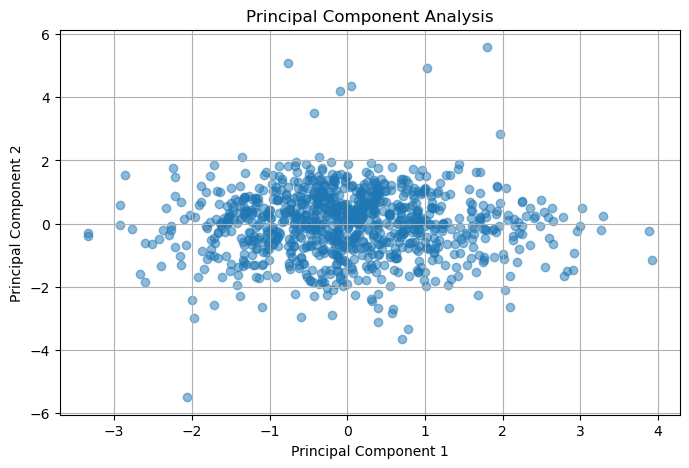

In [41]:
# Plot the first two principal components
plt.figure(figsize=(8, 5))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.grid(True)
plt.show()

## K-Means Clustering

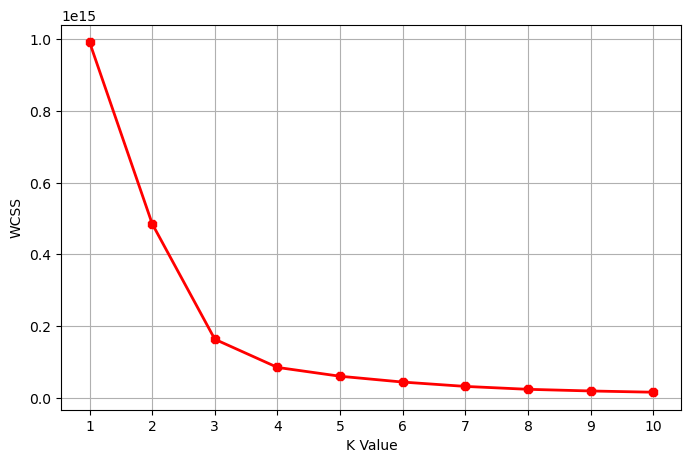

In [42]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init= 10, random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

#### K = 3

In [43]:
model = KMeans(n_clusters=3, n_init=10, random_state=42)
model.fit_predict(df3)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster': model.labels_})], axis = 1)

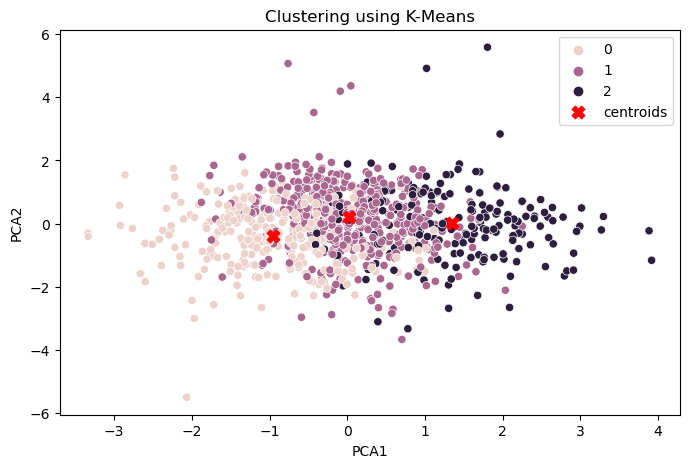

In [44]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df_kmeans)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker = 'X', c = 'r', s = 80, label = 'centroids')
plt.title('Clustering using K-Means')
plt.legend()
plt.show()

## Segments Profiling

In [45]:
df4 = pd.concat([df, pd.DataFrame({'Cluster': model.labels_})], axis = 1)
df4.head()

,age,city,profession,marital_stat,education,family_count,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_brand,preferred_price_range,preferred_wheel_count,Cluster
0,30,New Delhi,Working Professional,Single,Post Graduate,4,1.770466e+06,Yes,SUV,Yes,MG,<5 lakhs,2,1
1,27,Ahmedabad,Not Working,Single,Post Graduate,4,7.600731e+05,Yes,SUV,Yes,Nissan,5-15 lakhs,4,1
2,28,Pune,Working Professional,Single,Post Graduate,4,2.779701e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,4,0
3,26,Pune,Salaried,Single,Post Graduate,4,1.473698e+06,Yes,Sedan,Yes,Tata,15-25 lakhs,2,1
4,25,Pune,Working Professional,Single,Post Graduate,4,2.430643e+06,Yes,Sedan,Yes,Hyundai,5-15 lakhs,4,1


In [46]:
cluster_count = df4['Cluster'].value_counts()
cluster_count

Cluster
1    496
0    293
2    201
Name: count, dtype: int64

<Axes: xlabel='Cluster', ylabel='count'>

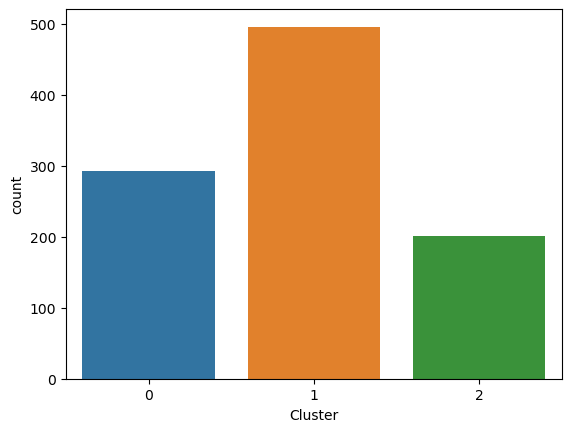

In [47]:
sns.countplot(x = 'Cluster', data = df4)

In [48]:
df4 = df4.drop(['profession', 'education', 'marital_stat', 'preferred_brand', 'city', 'family_count'], axis = 1)
df4.head()

,age,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_price_range,preferred_wheel_count,Cluster
0,30,1.770466e+06,Yes,SUV,Yes,<5 lakhs,2,1
1,27,7.600731e+05,Yes,SUV,Yes,5-15 lakhs,4,1
2,28,2.779701e+06,Maybe,Sedan,Yes,<5 lakhs,4,0
3,26,1.473698e+06,Yes,Sedan,Yes,15-25 lakhs,2,1
4,25,2.430643e+06,Yes,Sedan,Yes,5-15 lakhs,4,1


In [49]:
#Lets look at these attributes a bit closer
df5 = df4.copy()

In [50]:
# Define the specific income and age bins and labels as requested
income_bins_custom = [0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 4000000, 5000000, 10000000, 100000000]
income_labels_custom = ['<5 lakhs', '5-10 lakhs', '10-15 lakhs', '15-20 lakhs', '20-25 lakhs', '25-30 lakhs', 
                        '30-40 lakhs', '40-50 lakhs', '50 lakhs-1 Cr', '>1 Cr']

age_bins = range(0, df5['age'].max() + 10, 10)
age_labels = [f'{i}-{i+9}' for i in age_bins[:-1]]

# Categorize the 'age' column
df5['age'] = pd.cut(df5['age'], bins=age_bins, labels=age_labels, right=False)

# Categorize the 'annual_income' column 
df5['annual_income'] = pd.cut(df5['annual_income'], bins=income_bins_custom, labels=income_labels_custom, include_lowest=True)
df5.head()

,age,annual_income,replace_with_ev,preferred_ev_type,think_ev_are_economical,preferred_price_range,preferred_wheel_count,Cluster
0,30-39,15-20 lakhs,Yes,SUV,Yes,<5 lakhs,2,1
1,20-29,5-10 lakhs,Yes,SUV,Yes,5-15 lakhs,4,1
2,20-29,25-30 lakhs,Maybe,Sedan,Yes,<5 lakhs,4,0
3,20-29,10-15 lakhs,Yes,Sedan,Yes,15-25 lakhs,2,1
4,20-29,20-25 lakhs,Yes,Sedan,Yes,5-15 lakhs,4,1


In [51]:
df5['preferred_wheel_count'] = df5['preferred_wheel_count'].astype('object')
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      990 non-null    category
 1   annual_income            987 non-null    category
 2   replace_with_ev          990 non-null    object  
 3   preferred_ev_type        990 non-null    object  
 4   think_ev_are_economical  990 non-null    object  
 5   preferred_price_range    990 non-null    object  
 6   preferred_wheel_count    990 non-null    object  
 7   Cluster                  990 non-null    int32   
dtypes: category(2), int32(1), object(5)
memory usage: 45.4+ KB


In [52]:
def plot_proportions(column_name):
    
    df_column = df5[[column_name, 'Cluster']]
    
    data_profile = pd.get_dummies(df_column, dtype='uint8')
    
    data_pivot = data_profile.groupby('Cluster').mean().T
    
    data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
    data_pivot_mean.columns = ['Variable', 'Value']
    
    plt.figure(figsize = (10, 8))
    for i in range(3):
        plt.subplot(2, 2, i+1)
        sns.barplot(data_pivot, x = i, y = data_pivot.index)
        sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
        for index, row in data_pivot_mean.iterrows():
            plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
        plt.ylabel("")
        plt.xlabel("")
        plt.title(f"Cluster {i}: {data_profile['Cluster'].value_counts()[i]} ({data_profile['Cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
    plt.suptitle("Segment profile plot for the four-segments ", fontsize = 15)
    plt.tight_layout()
    plt.show()

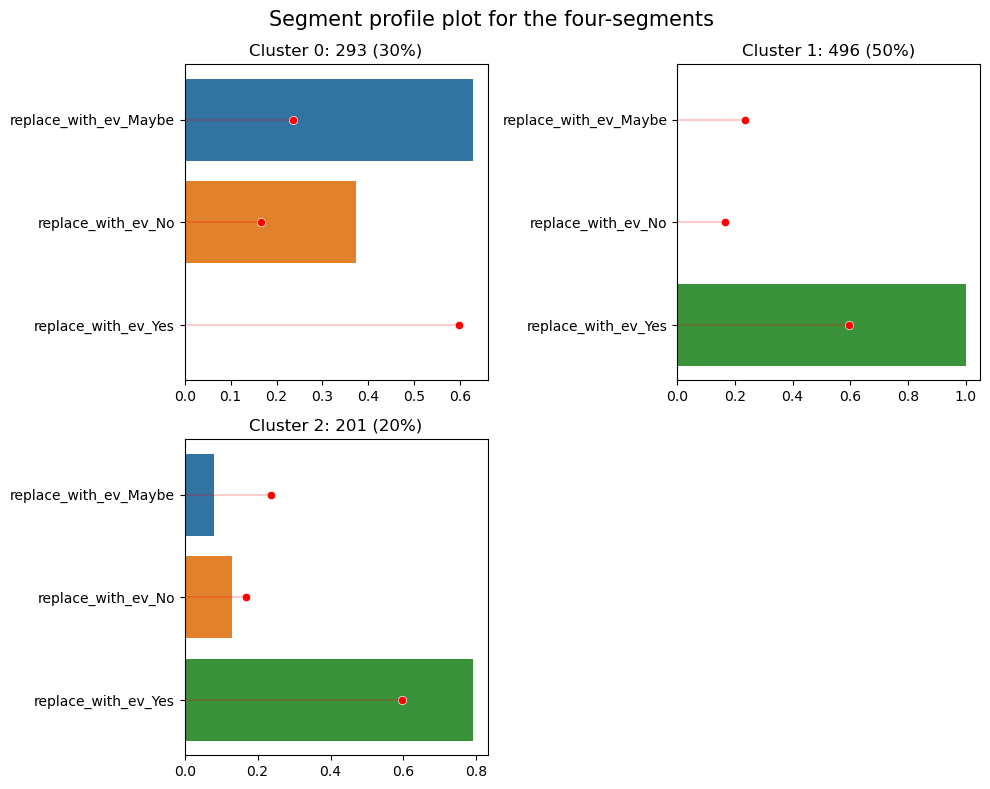

In [53]:
plot_proportions('replace_with_ev')

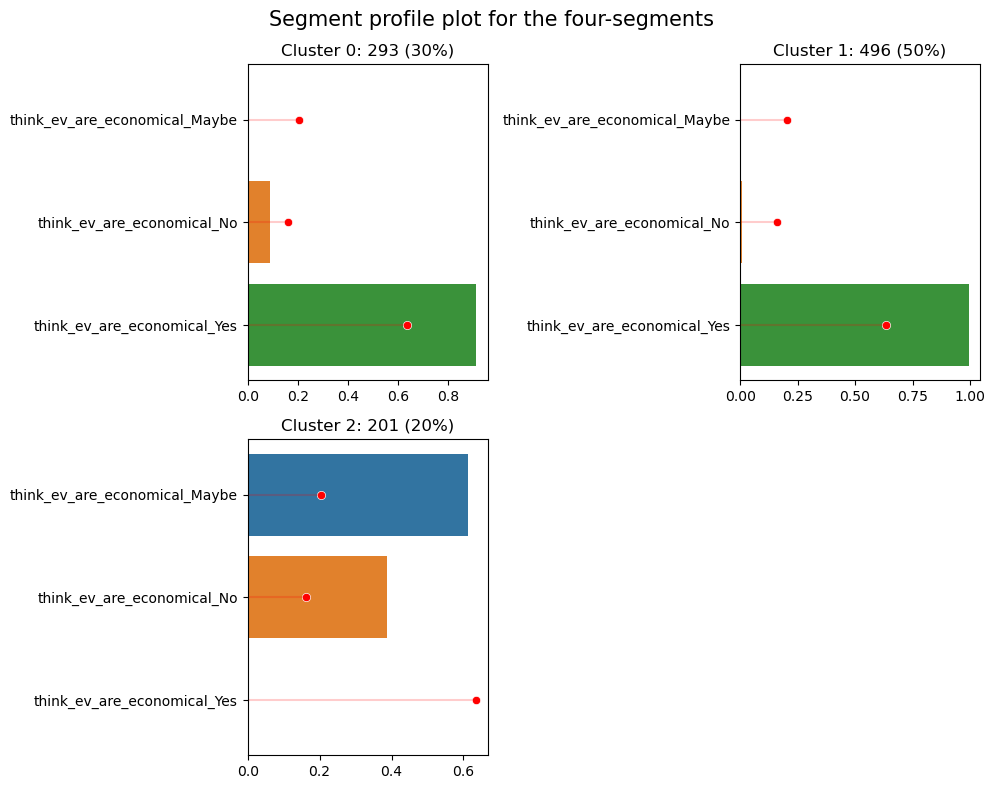

In [54]:
plot_proportions('think_ev_are_economical')

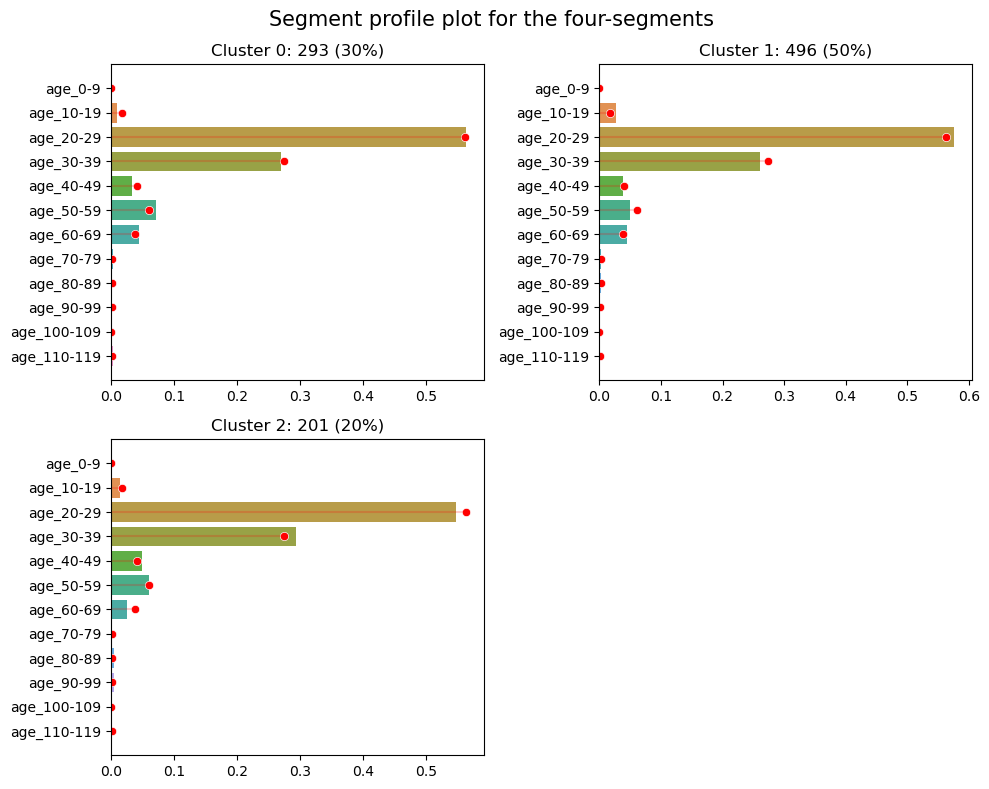

In [55]:
plot_proportions('age')

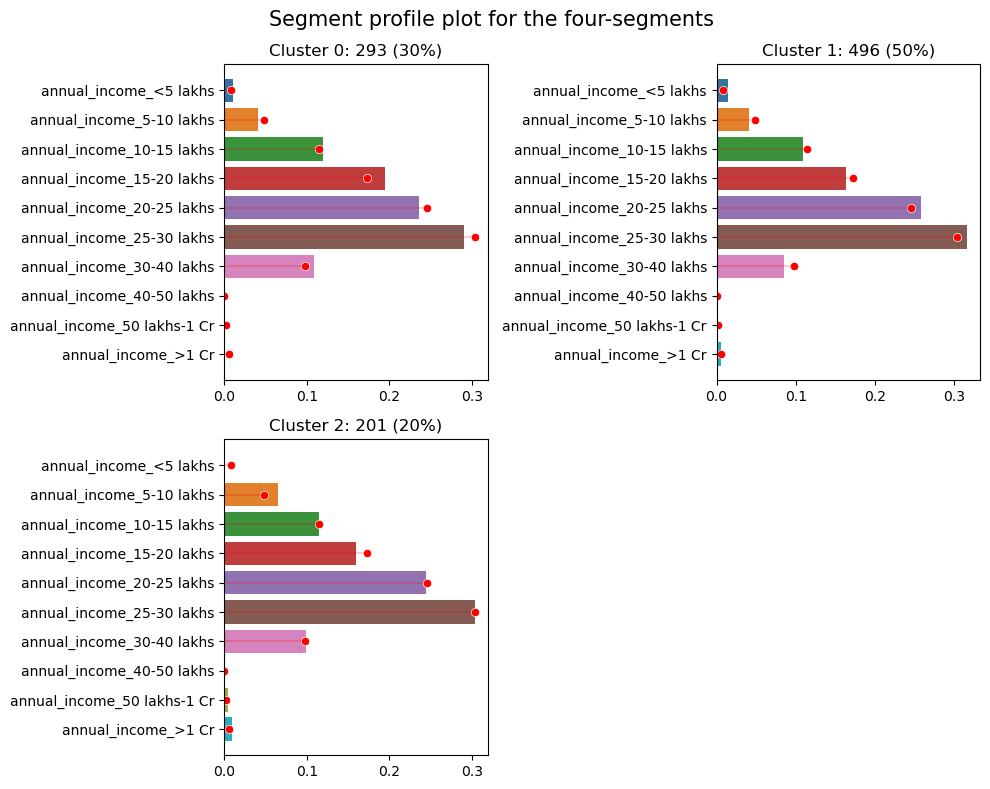

In [56]:
plot_proportions('annual_income')

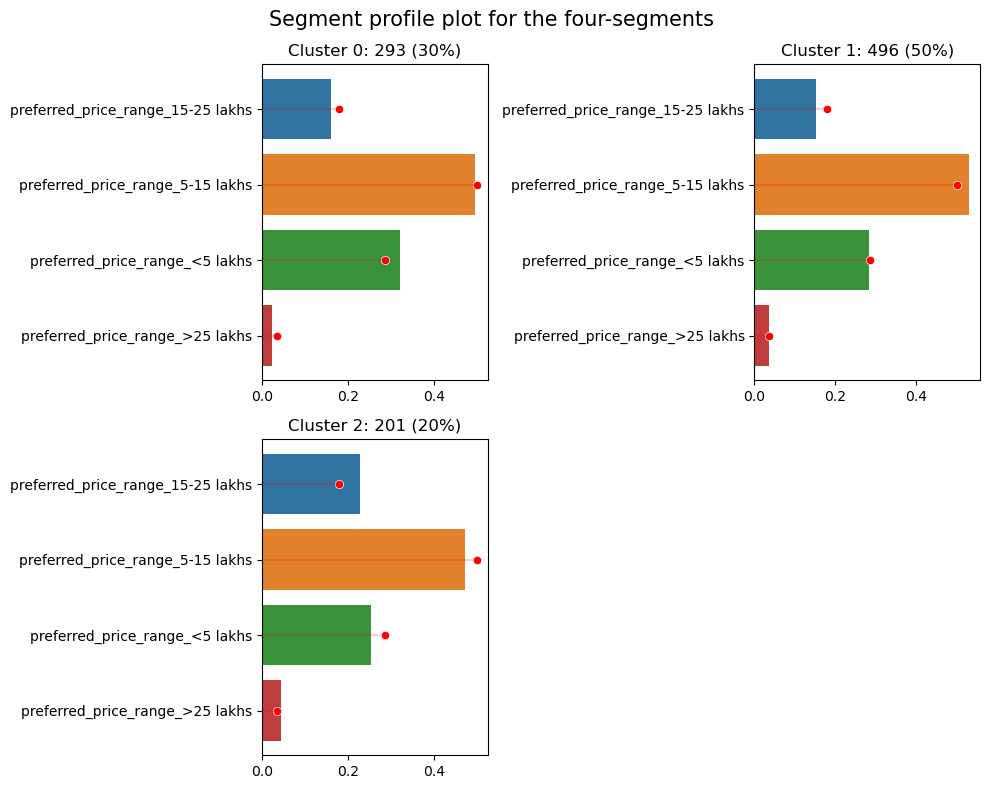

In [57]:
plot_proportions('preferred_price_range')

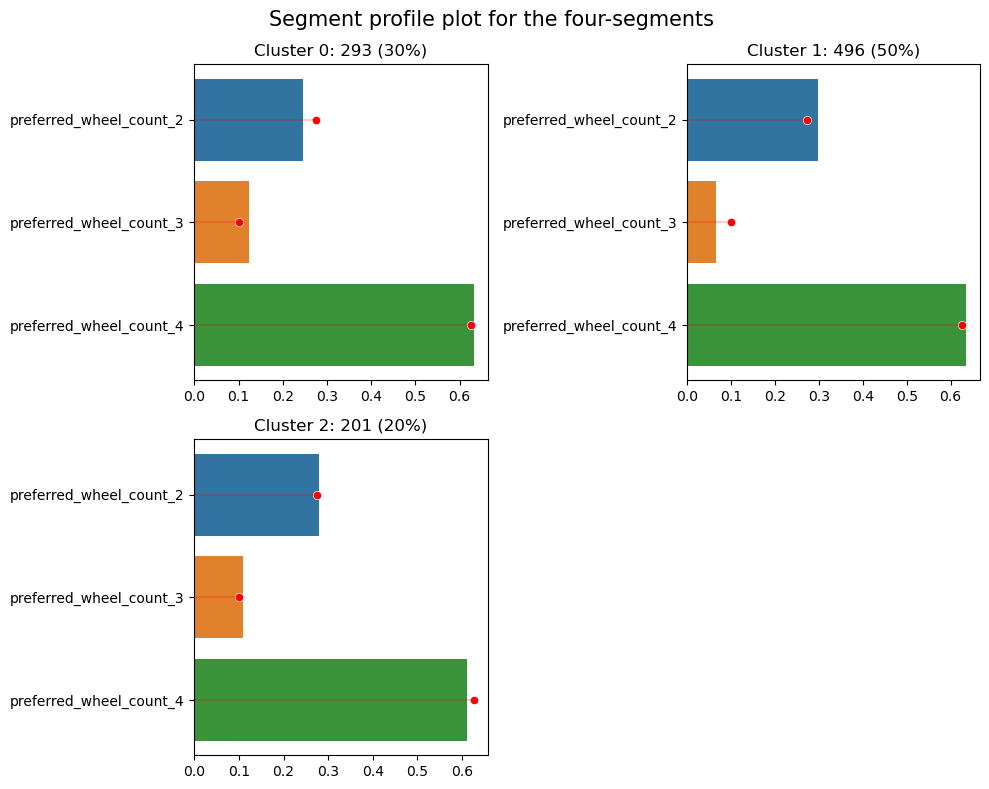

In [58]:
plot_proportions('preferred_wheel_count')

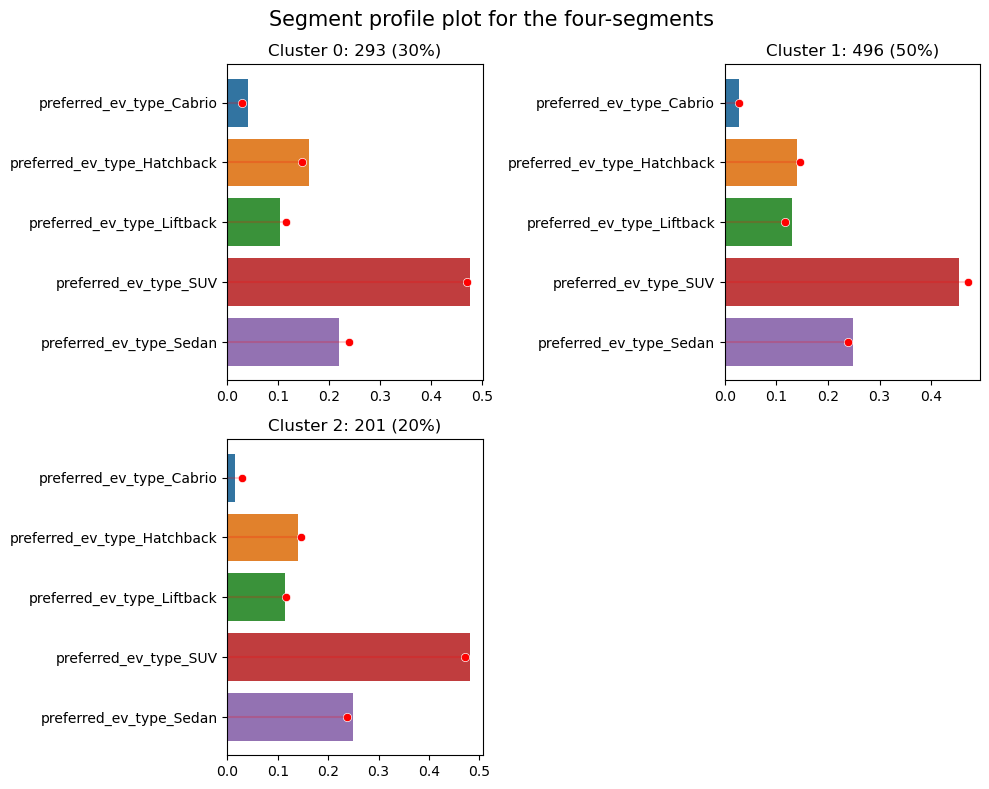

In [59]:
plot_proportions('preferred_ev_type')

### -------------------------------------------------------------------------------------------------------------------------------------------------

## Cluster 0 Overview:

### Cluster 0 has 293 entries and accounts for 30% of the data.

1. Replace with EV: Majority are either impartial with shifting to EVs or do not wish to shift to EV.
2. Think EVs are economical: Most are aware that EVs are economical. 
3. Age: While most belong to the age-group 20-39, this cluster has above average proportion of people aged 50-69.
4. Annual Income: This cluster has above-average proportions of people earning Rs. 10-20 lakh per annum, along with a significant portion of people earning Rs. 30-40 lakh per annum. This suggest this Cluster has a mix of middle income class to upper-middle class. 
5. Preferred Price Range: Above average proportion of people prefer price range of below Rs. 5 lakh and a significant proportion preferring Rs. 5-15 lakh price range. 
6. Preferred EV type: Cabrio, Hatchback and SUV

### Cluster 0 Conclusion:

This sector accounts for 30% of the population. Despite the majority knowing that EVs are economical, majority are either impartial or do no wish to shift to EVs. This could be because of a number of factors such as:
- slow technology adoption
- frequency of use
- purpose of using automobile
- misinformation or myths about EV performance
- Affordability

With the right type of advertisement, the EV startup can persuade at least half of this segment to switch to EVs. People in this segment can be potential customers for 2-wheeler EVs which are typically priced below Rs. 2-5lakhs as well as 4-wheelers priced below Rs. 15 lakhs.  


### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Cluster 1 Overview:

### Cluster 1 has 496 entries and accounts for 50% of the population.

1. Replace with EV: Everyone in this cluster wants to switch to EV.
2. Think EVs are economical: Everyone thinks EVs are economcial.
3. Age: Above average proprotion of 15-30 year old individual. This cluster comprises of Young Adults as well as significant proprotions of people in the age groups 60-70.
4. Annual Income: Above average proportions of people earning Rs. 20-30 lakh. 
5. Preferred Price Range: above avg prop of people preferring Rs. 5-15lakh ranged cars. 
6. Preferred EV types: Liftback and Sedan

### Cluster 1 Conclusion:

This segment does not require heavy invests in advertisements and make the majority of the cutomer base preferring EVs ranged Rs. 5-15Lakhs. 

### --------------------------------------------------------------------------------------------------------------------------------------------------------

## Cluster 3 Overview:

### Cluster 3 has 201 observations and accounts for 20% of the population.

1. Replace with EV: Majority want to replace with EV, however, there is some proportion of people who don't or are indifferent.
2. Think EVs are Economical: Most are skeptical or dont think EVs are economical.
3. Age: This cluster consist of people between the age of 30-60.
4. Annual Income: Above avg proportions of those earning Rs. 5-10 lakhs, 20-40 lakhs as well as more than 1Cr annually. 
5. Preferred Price Range: Above avg prop of people preferring EVs ranged more than Rs. 15 lakhs. 
6. Preferred EV type: SUV and Sedan

### Cluster 3 Conclusion:

This segment has a high proportion of upper-income class and therefore are potential customers for more high-end products. Some investment in highlighting the benefits of EVs and how they're economical might increase sales.

### ------------------------------------------------------------------------------------------------------------------------------------------------------

## Overall Conclusion:

Broadly speaking, the most optimum segment of the population that are likely to adopt EVs are 20-30 year of age and earning upto 20-30 lakh per annum.

On conducting deeper analysis, we discover 3 segments of the population.

Cluster 0: 
- Potential for high 2-wheeler and 3-wheeler sales.
- Lower Priced EVs.
- High cost of Advertisement.

Cluster 1: 
- Potential for high 2-wheeler and 4-wheeler sales.
- Low to Medium Priced EVs.
- Moderate cost of Advertisement.

Cluster 2:
- Potential for high luxury product sales.
- High Priced EVs.
- Low cost of Advertisement.